In [1]:
#First we will import all the libraries
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
#url of csv file
#Read csv file
#I am not downloading the csv file instead ,reading the values directly from the url.
#You can download and give column names accordingly.
#columnn names can also change as this file is present some central repo.
url='https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data';
#columns which we are reading in csv file
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#Reading the csv file using pandas
train_data=pd.read_csv(url,header=None,names=col_names)
#getting the first 5 rows
train_data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
train_data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#Now we will train our model
featured_column=['bmi','insulin']
x=train_data[featured_column]#We will take only this columns to decide whther the person is diabetic or not
y=train_data['label']#This will be the final answer

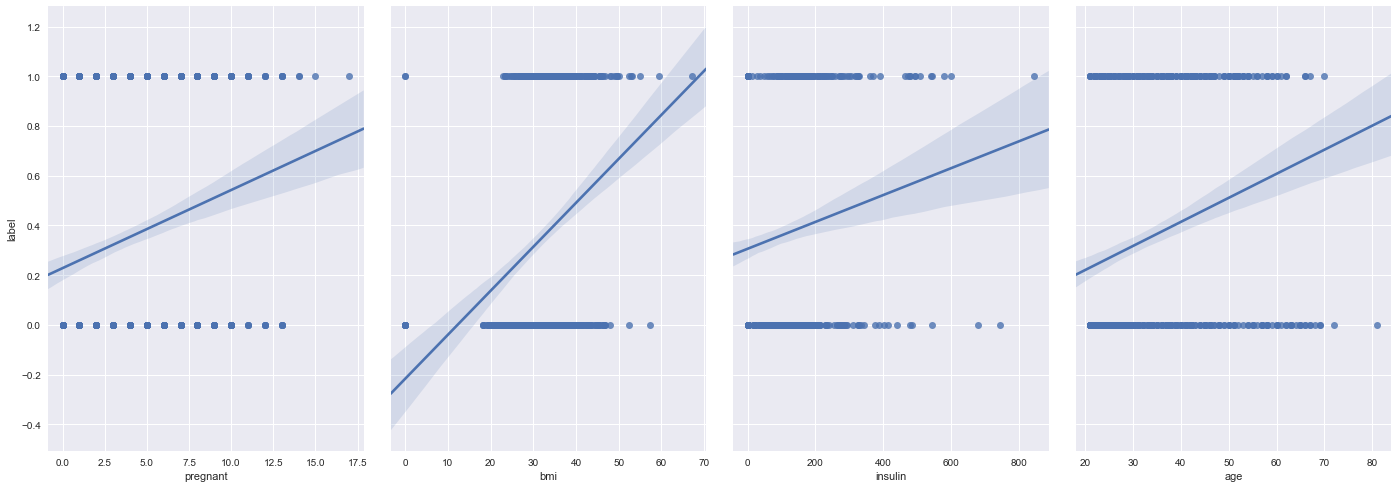

In [5]:
#Plotting the graph to see the distribution of data
sns.pairplot(train_data, x_vars=['pregnant','bmi','insulin','age'], y_vars='label', size=7, aspect=0.7, kind='reg')
sns.plt.show()

In [6]:
#This step is to partition data into training and testing data.It shows how our model will predict.
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

C:\Users\kumara213\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
#Import Library
from sklearn import svm

One can tune the SVM by changing the parameters C, \gamma and the kernel function. The function for tuning the parameters available in scikit-learn is called gridSearchCV().

sklearn.model_selection.GridSearchCV(estimator, param_grid)

Parameters of this function are defined as:

estimator: It is the estimator object which is svm.SVC() in our case.
param_grid: It is the dictionary or list with parameters names (string) as keys and lists of parameter settings to try as values.

In [8]:
# Create SVM classification object 
#from sklearn.model_selection import GridSearchCV 
#parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma': 
              #[0.01,0.02,0.03,0.04,0.05,0.10,0.2,0.3,0.4,0.5]}
#svr = svm.SVC()
#grid = GridSearchCV(svr, parameters)
#grid.fit(x_train, y_train)
#predicted = grid.predict(x_test)
#cnf_matrix = confusion_matrix(y_test, predicted)
#print(cnf_matrix)
model = svm.SVC(kernel='linear', C=1, gamma=100)

In [9]:
# there is various option associated with it, like changing kernel, gamma and C value. Will discuss more # about it in next section.Train the model using the training sets and check score
model.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
predicted= model.predict(x_test)
predicted.shape

(192,)

In [11]:
predicted
count=0
for i in range(len(predicted)):
    if predicted[i]==y_test.values[i]:
        count=count+1

print("count",count,"percentage",count/192)

count 133 percentage 0.6927083333333334


In [12]:
#For KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred
count=0
for i in range(len(y_pred)):
    if y_pred[i]==y_test.values[i]:
        count=count+1

print("count",count,"percentage",count/192)

count 136 percentage 0.7083333333333334


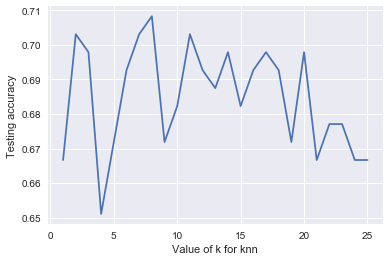

In [13]:
#predicting best value of k
k_range=range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel("Value of k for knn")
plt.ylabel("Testing accuracy")

In [15]:
#Import Library
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
predicted_bayes= model.predict(x_test)

In [19]:
len(predicted_bayes)

192

In [18]:
count=0
for i in range(len(predicted_bayes)):
    if predicted_bayes[i]==y_test.values[i]:
        count=count+1

print("count",count,"percentage",count/192)

count 132 percentage 0.6875
